# Assimilating EO data into an ecosystem model with a particle filter 

* The aim of today's practical is to explore the blending of **observations** and **models**
* You will use the **DALEC ecosystem model**, that tracks the fate of C through photosynthesis, biomass allocation and decomposition.
* We will use **observations of LAI** from space-borne sensors to keep the model in track
* The observations will be combined with the model using a type of **particle filter** (a **sequential Metropolis-Hastings filter**)
* We will focus on the Metolius Young Pine FLUXNET site, and will compare assimilation results to flux tower data.


## The DALEC model
The DALEC model is a simple box model of C cycling.
![DALEC](http://ars.els-cdn.com/content/image/1-s2.0-S0034425707003276-gr2.jpg)

1. Carbon is acquired through the GPP box, which uses the very simple ACM model to model photosynthesis as a function of $LAI$, and temperature, incoming radiation, $CO_2$ concentration and VPD.
2. Part of the GPP is lost as **autototrophic respiration**, to get NPP.
3. The NPP is allocated to the **foliar**, **woody** and **roots** pools.
4. The foliar and root pools loose C to the **litter** pool.
5. The woody biomass pool looses C to the **SOM/Woody debris** pool.
6. The litter pool decomposes into the **SOM** pool
7. Both **litter** and **SOM** pools release C back to the atmopshere through microbial activity and **heterotrophic respiration**

* The DALEC model has been calibrated for the Metolius site
* We have a fairly rough understanding of the different C pools at around 2000.
* However, the DALEC model is **very simplistic**!!! 
* The idea is that this simple model can be made to track observations, and hence combine heterogeneous observational streams into a consistent story of what's happening to C.

## The MODIS observations

* We will use the MODIS LAI product, which provides both an estimate of LAI and of uncertainty in LAI.
* This product takes the **red** and **nir** reflectance, and maps them to LAI.
* The uncertainty of the LAI product is controlled by things like cloudiness, snow, etc.

Text(0,0.5,'LAI $m^2m^{-2}$')

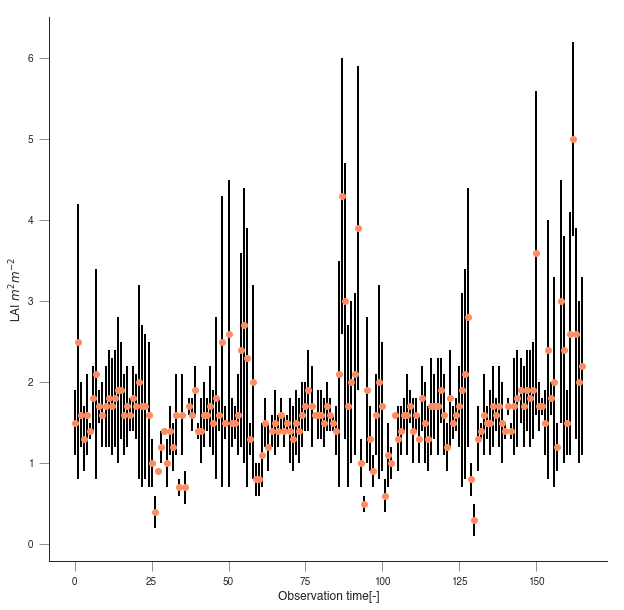

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
d=np.loadtxt("data/Metolius_MOD15_LAI.txt")
plt.figure(figsize=(10,10))
x = np.arange( 166 )
plt.plot ( x, d[:, 2], 'o' )
plt.vlines ( x, d[:, 2] - d[:, 3], d[:, 2] + d[:, 3] )
plt.xlabel("Observation time[-]")
plt.ylabel(r'LAI $m^2m^{-2}$')

## Data assimilation as Bayesian update

* Carbon pools are parameterised by a PDF
* Spread of the PDF defines our belief where the true value of the pool lies
    * This is inherently Bayesian approach!
* We start with a rough estimate of the pool sizes...
* We *update* the pool sizes conditioned on observations of LAI
* This new estimate is now used as **the prior** for the next step
* The DALEC model is used to **propagate** the state from one time step to the next
    * We assume the DALEC model is wrong, so propagation implies noise inflation

## The particle filter

* We will use the Dowd 2007 **sequential MH PF**
* The model of our dynamic system is given by 

\begin{split}
    \mathbf{x}_{k+1} &= \mathcal{M}(\mathbf{x}_{k},I) + \nu\\
    \mathbf{y}_{k+1} &=\mathcal{H}(\mathbf{x}_{k+1},S) + \eta,
\end{split}

* The first equation encodes the forward propagation of the state in time using the model
* The second couples the state with the observations
* We will couple the foliar C pool $C_f$ with observed LAI from MODIS, noting that they are related by the SLA (assumed known).


* The filter propagates a number of *particles* that determine the state using the model, and addss a random forcing
* **If** an observation is available, then particles which are able to better explain the observation (i.e., where the foliar C pool scaled by SLA is close to the observed LAI) will tend to dominate, whereas particles that are far from the LAI observation will tend to be rejected.
* After a few iterations, the trajectory ought to start tracking the observations.

![pf trajectory](http://jgomezdans.github.io/dalec_pf/pf_trajectories.png)